In [2]:
import pandas as pd
import geopandas

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import rasterio
from rasterio.plot import show
import fiona
import rasterio
import rasterio.mask

import matplotlib.colors

In [7]:
tiff = '../input/data/koeppen/Beck_KG_V1_present_0p0083.tif'
mask = '../input/shapes/Districts/Mtwara DC.shp'

In [8]:
with fiona.open(mask, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [67]:
with rasterio.open(tiff) as src:
    nodata=src.nodata
    nodata=0
    color = src.colormap(1)
    
    # complete image
    band1_all = src.read(1, masked=True)
    
    # cut image
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, nodata=nodata)
    out_meta = src.meta
    band1_cut = out_image[0]
    band1_cut = band1_cut.astype(np.float32)
    band1_cut[band1_cut==nodata] = np.nan

In [68]:
band1_cut

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [38]:
palette = np.array(list(color.values()))

# drop alpha channel
palette = np.delete(palette, -1, axis=1)

# rgb values need to be defined between 0 and 1, so divide by 255
cmap = matplotlib.colors.ListedColormap(palette / 255)

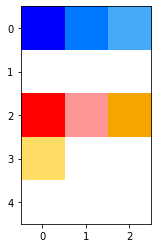

In [44]:
# test color map
plt.imshow([[1, 2, 3], 
            [np.nan, np.nan, np.nan],
            [4, 5, 6],
            [7, np.nan, np.nan],
            [np.nan, np.nan, np.nan],
           ], cmap=cmap, vmin=0, vmax=255, interpolation='none')
plt.show()

In [45]:
np.unique(band1_all, return_counts=True)

(masked_array(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
                    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                    28, 29, 30],
              mask=False,
        fill_value=999999,
             dtype=uint8),
 array([623841870,   8296822,   6033532,  20101609,  27916852,  11678445,
          9805477,  13995377,   2079073,   1235853,     12433,   5337845,
          2179837,      8667,   7539294,   3972955,    195886,    369836,
           899422,   4076074,    178672,   1861694,   1957544,   5864640,
           619687,   3169936,  13651363,  37508233,   1772615,  22102995,
         94855462]))

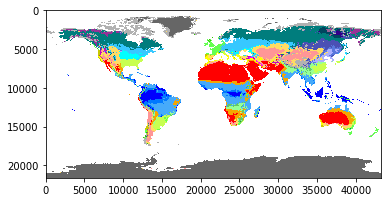

In [46]:
plt.imshow(band1_all, cmap=cmap, vmin=0, vmax=255, interpolation='none')
plt.show()

In [69]:
np.unique(band1_cut, return_counts=True)

(array([ 3., nan], dtype=float32), array([2246, 2906]))

In [73]:
np.count_nonzero(~np.isnan(band1_cut))

2246

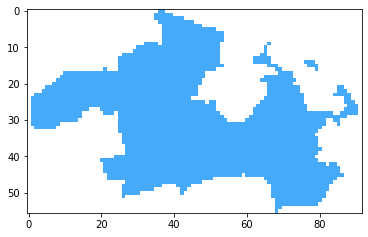

In [71]:
plt.imshow(band1_cut, cmap=cmap, vmin=0, vmax=255, interpolation='none')
plt.show()

In [74]:
band1_cut

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)